In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [3]:
class PermutedMNIST(Dataset):
    def __init__(self, data, permutation=None):
        self.data = data
        if permutation is not None:
            self.permutation = permutation
        else:
            np.random.permutation(28*28)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img, label = self.data[idx]
        
        img_flattened = np.array(img).flatten()  
        permuted_image = img_flattened[self.permutation] 
        permuted_image = permuted_image.reshape(28, 28)  
        
        permuted_image_tensor = torch.tensor(permuted_image, dtype=torch.float32).unsqueeze(0)  
        
        return permuted_image_tensor, label

In [4]:
def permute_dataset():

    train_data= datasets.MNIST(root='./data', train=True, download=True)
    
    task_datasets = []
    num_tasks = 10
    for i in range(num_tasks): 
        random_permutation = np.random.permutation(28 * 28) 
        permuted_dataset = PermutedMNIST(train_data, random_permutation)
        task_datasets.append(permuted_dataset)
    
    return task_datasets

In [5]:
def create_task_dataloaders(task_datasets, batch_size=64):
    task_loaders = []
    for task_dataset in task_datasets:
        task_loader = DataLoader(task_dataset, batch_size=batch_size, shuffle=True)
        task_loaders.append(task_loader)
    return task_loaders

In [6]:
task_datasets = permute_dataset()
task_dataloaders = create_task_dataloaders(task_datasets)


In [11]:
def plot_images(dataloader, task_idx):
    images, labels = next(iter(dataloader))
    grid_img = torchvision.utils.make_grid(images[:20], nrow=10)
    plt.imshow(grid_img.permute(1, 2, 0).squeeze(), cmap='gray')  
    plt.title(f"Task {task_idx+1} permutation")
    plt.axis('off')
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


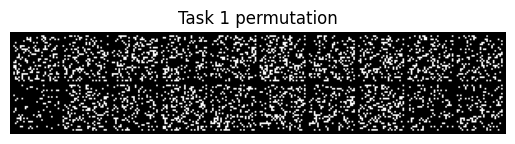

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


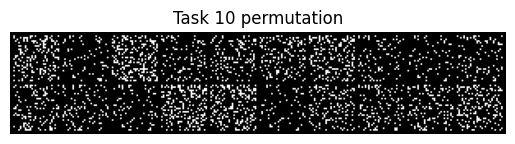

In [12]:
plot_images(task_dataloaders[0], task_idx=0) 
plot_images(task_dataloaders[9], task_idx=9) 